In [1]:
import umap.aligned_umap
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-09-28 16:35:19.525953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 16:35:20.130716: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-09-28 16:35:20.130761: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinf

In [2]:
path1 = "/home/yifan/dataset/clean/pairflip/cifar10/0"
path2 = "/home/yifan/Exp/Dropout/0.3/experiment1"

In [3]:
def getData(path,epoch):
    ##### get representation
    X_train = np.load(os.path.join(path,"Model","Epoch_{}".format(epoch),"train_data.npy"))
    X_test = np.load(os.path.join(path,"Model","Epoch_{}".format(epoch),"test_data.npy"))
    
    #### get label
    training_label_loc =  os.path.join(path, "Training_data", "training_dataset_label.pth")
    y_train = torch.load(training_label_loc, map_location="cpu")
    y_train = y_train.numpy()
    testing_label_loc =  os.path.join(path, "Testing_data", "testing_dataset_label.pth") 
    y_test = torch.load(testing_label_loc, map_location="cpu")
    y_test = y_test.numpy()

    return X_train, X_test, y_train, y_test


In [4]:
X_train1, X_test1, y_train1, y_test1 = getData(path1,150)
X_train2, X_test2, y_train2, y_test2 = getData(path2,150)

In [5]:
X_train2 = X_train2.reshape(X_train2.shape[0],X_train2.shape[1])

In [6]:
import numpy as np
from scipy.linalg import svd

# 假设 data1 和 data2 已经给出
# 例如：
# data1 = np.random.rand(50000, 512)
# data2 = np.random.rand(50000, 512)

def orthogonal_mapping(data1, data2):
    """
    使用Orthogonal Mapping方法将data2映射到data1空间。
    
    :param data1: numpy array, shape (n_samples, n_features)
    :param data2: numpy array, shape (n_samples, n_features)
    :return: data2_mapped: numpy array, 映射后的data2
    """
    # 步骤1: 中心化数据
    data1_centered = data1 - np.mean(data1, axis=0)
    data2_centered = data2 - np.mean(data2, axis=0)

    # 步骤2: 计算交叉协方差矩阵
    C = data2_centered.T @ data1_centered

    # 步骤3: 奇异值分解
    U, _, Vt = svd(C)

    # 步骤4: 计算正交映射矩阵
    W = U @ Vt

    # 步骤5: 应用映射矩阵
    data2_mapped = data2_centered @ W
    
    return data2_mapped

# 使用函数
# data2_mapped = orthogonal_mapping(data1, data2)


In [7]:
print(X_train1.shape)
print(X_train2.shape)
data2_mapped = orthogonal_mapping(X_train1,X_train2)

(50000, 512)
(50000, 512)


In [29]:
np.random.seed(23423)
nA = 3000
nRest = 6000
#set_up_parameters

epochs = 200
n_neighbors= 30
n_components = 2
MIN_DIST = 0.1
neg_sample_rate = 5
n = X_train.shape[0]
    


%load_ext autoreload
%autoreload 2

np.random.seed(23423)

rand_perm = np.random.permutation(n)

X_train_rp = X_train
y_train_rp = y_train
print(X_train_rp.shape)

X_train200, _, y_train200, _ = getData(path1,200)
X_train150, _, y_train150, _ = getData(path1,150)
X_train100, _, y_train100, _ = getData(path1,100)
X_train50, _, y_train50, _ = getData(path1,50)
X_train1, _, y_train1, _ = getData(path1,1)
X_train50 = X_train50.reshape(X_train50.shape[0],X_train50.shape[1] )
X_train1 = X_train1.reshape(X_train1.shape[0],X_train1.shape[1] )


X2_train200, _, y2_train200, _ = getData(path2,200)
X2_train200 = X2_train200.reshape(X2_train200.shape[0],X2_train200.shape[1] )



X_train_rp = X_train200[:(nA +nRest )] 
y_train_rp = y_train200[:(nA +nRest )] 



X_train_rp = np.concatenate((X_train_rp, X2_train200[:nRest]),axis=0)
y_train_rp = np.concatenate((y_train_rp, y2_train200[:nRest]),axis=0)

# X_train_rp = np.concatenate((X_train_rp, X_train100[:nRest]),axis=0)
# y_train_rp = np.concatenate((y_train_rp, y_train100[:nRest]),axis=0)

# X_train_rp = np.concatenate((X_train_rp, X_train50[:nRest]),axis=0)
# y_train_rp = np.concatenate((y_train_rp, y_train50[:nRest]),axis=0)

# X_train_rp = np.concatenate((X_train_rp, X_train1[:nRest]),axis=0)
# y_train_rp = np.concatenate((y_train_rp, y_train1[:nRest]),axis=0)



SETA = X_train_rp[:nA]
y_SETA = y_train_rp[:nA]

SETS = []
y_SETS = []
DATA = []

N_DATA = []

for i in range(2):
    pass
    print('in loop')
    
    setb = X_train_rp[nA+nRest*i:nA+nRest*(i+1)]
    y_setb = y_train_rp[nA+nRest*i:nA+nRest*(i+1)]
    data = np.concatenate((SETA,setb))
    N_DATA.append(data.shape[0])
    
    SETS.append(setb)
    y_SETS.append(y_setb)
    DATA.append(data)

    
print('out of loop')    

SETS = np.array(SETS)
DATA = np.array(DATA)
N_DATA = np.array(N_DATA)

n_SET = SETS.shape[0]

print(SETA.shape, SETS.shape, SETS[0].shape, DATA.shape, n_SET)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(50000, 512)
(50000, 512, 1, 1)
in loop
in loop
out of loop
(3000, 512) (2, 6000, 512) (6000, 512) (2, 9000, 512) 2


In [30]:
from MANE import *

GRAPHS = []
ROWS = []
COLUMNS = []
WEIGHTS = []
EPOCHS_PER_SAMPLE = []
EPOCH_OF_NEXT_SAMPLE = []
EPOCHS_PER_NEGATIVE_SAMPLE = []
EPOCH_OF_NEXT_NEGATIVE_SAMPLE = []

SET_IDX = []
K_IDX = []

for iset in range(n_SET):
    graph = get_prob_matrix(DATA[iset],n_neighbors=n_neighbors)
    graph.data[graph.data < (graph.data.max() / float(epochs))] = 0.0
    graph.eliminate_zeros()
    
    epochs_per_sample = make_epochs_per_sample(graph.data, epochs)
    epoch_of_next_sample = epochs_per_sample.copy()
    epochs_per_negative_sample = epochs_per_sample / neg_sample_rate
    epoch_of_next_negative_sample = epochs_per_negative_sample.copy()
    
    set_idx = iset*np.ones(len(epochs_per_sample),dtype=np.int)
    k_idx = np.arange(epochs_per_sample.shape[0],dtype=np.int)
    
    SET_IDX.append(set_idx)
    K_IDX.append(k_idx)
    
    ROWS.append(graph.row)
    COLUMNS.append(graph.col)
    EPOCHS_PER_SAMPLE.append(epochs_per_sample)
    EPOCH_OF_NEXT_SAMPLE.append(epoch_of_next_sample)
    EPOCHS_PER_NEGATIVE_SAMPLE.append(epochs_per_negative_sample)
    EPOCH_OF_NEXT_NEGATIVE_SAMPLE.append(epoch_of_next_negative_sample)
    
    print(epochs_per_sample.shape)
print(SET_IDX)



SET_IDX = np.array(np.concatenate(SET_IDX)).reshape(-1)
K_IDX = np.array(np.concatenate(K_IDX)).reshape(-1)

n_idx = np.random.permutation(len(SET_IDX))
SET_IDX = SET_IDX[n_idx]
K_IDX = K_IDX[n_idx]

print('done')

Processed  1000  of  9000  samples.
Processed  2000  of  9000  samples.
Processed  3000  of  9000  samples.
Processed  4000  of  9000  samples.
Processed  5000  of  9000  samples.
Processed  6000  of  9000  samples.
Processed  7000  of  9000  samples.
Processed  8000  of  9000  samples.
Processed  9000  of  9000  samples.


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

(509290,)
Processed  1000  of  9000  samples.
Processed  2000  of  9000  samples.
Processed  3000  of  9000  samples.
Processed  4000  of  9000  samples.
Processed  5000  of  9000  samples.
Processed  6000  of  9000  samples.
Processed  7000  of  9000  samples.
Processed  8000  of  9000  samples.
Processed  9000  of  9000  samples.
(429756,)
[array([0, 0, 0, ..., 0, 0, 0]), array([1, 1, 1, ..., 1, 1, 1])]
done


Hyperparameters a = 1.5769434604035877 and b = 0.8950608780665811


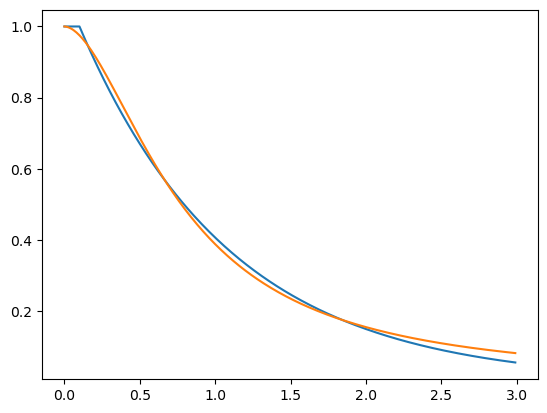

In [31]:
from scipy import optimize
x = np.linspace(0, 3, 300)

y = (x>MIN_DIST) * np.exp(-x+MIN_DIST)
y[x<=MIN_DIST] = 1.0

function = lambda x, a, b: 1 / (1 + a*x**(2*b))

p , _ = optimize.curve_fit(function, x, y) 

a = p[0]
b = p[1] 
print("Hyperparameters a = " + str(a) + " and b = " + str(b))

x_p = np.arange(0,3,0.01)
y_p = np.exp(- (x_p-MIN_DIST) * ( (x_p - MIN_DIST) >=0 ) )
y_p2 = 1 / (1 + a*x_p**(2*b))

plt.figure()
plt.plot(x_p,y_p, label='Target')
plt.plot(x_p,y_p2, label='Fitted')
plt.show()

In [32]:
from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components = n_components)
init = pca.fit_transform(SETA)
embA = init.astype(np.float32).copy()
expansion = 10.0 / np.abs(embA).max()
embA = (embA * expansion).astype(np.float32)

emb_sets = []

print('before initi')

for i in range(n_SET):
    data = DATA[i]
    emb_i = pca.transform(data[nA:])
    emb_i = (emb_i * expansion).astype(np.float32)
    
    emb_sets.append(emb_i)
    
print('after init')

repulsion_strength=1.0

init_lr = 1.0

#SET_IDX
#K_IDX

print(len(EPOCH_OF_NEXT_NEGATIVE_SAMPLE))
print(EPOCH_OF_NEXT_NEGATIVE_SAMPLE[0].shape)

import timeit

for epoch in range(epochs):
    pass
    
    if epoch%20==0:
        print('epoch ', epoch, 'of ', epochs)
    #print('epoch ', epoch, 'of ', epochs)
    start = timeit.default_timer()
    
    lr = init_lr * (1.0 - float(epoch)/float(epochs))
    
    #'''
    one_epoch_nsets(emCommon=embA, embS=emb_sets,
                     rows=ROWS, columns=COLUMNS,
                     nCommon=nA, n_points_=N_DATA,
                     Set=SET_IDX, K_idx=K_IDX,
                     a=a, b=b, dim=n_components,
                     lr=lr, epoch=epoch,
                     epochs_per_sample=EPOCHS_PER_SAMPLE,
                     epoch_of_next_sample=EPOCH_OF_NEXT_SAMPLE,
                     epochs_per_negative_sample=EPOCHS_PER_NEGATIVE_SAMPLE,
                     epoch_of_next_negative_sample=EPOCH_OF_NEXT_NEGATIVE_SAMPLE,
                     repulsion_strength=repulsion_strength)
    #'''
    stop = timeit.default_timer()
    print('Time for epoch ', epoch, ': ', stop - start) 

before initi
after init
2
(509290,)
epoch  0 of  200
Time for epoch  0 :  0.09685196168720722
Time for epoch  1 :  0.10302218422293663
Time for epoch  2 :  0.08865463733673096
Time for epoch  3 :  0.09104219824075699
Time for epoch  4 :  0.09383285045623779
Time for epoch  5 :  0.10256991162896156
Time for epoch  6 :  0.0983070358633995
Time for epoch  7 :  0.10827441327273846
Time for epoch  8 :  0.10137656144797802
Time for epoch  9 :  0.10518535412847996
Time for epoch  10 :  0.10463938117027283
Time for epoch  11 :  0.10642623342573643
Time for epoch  12 :  0.10611003637313843
Time for epoch  13 :  0.11104368790984154
Time for epoch  14 :  0.10985051840543747
Time for epoch  15 :  0.10742386244237423
Time for epoch  16 :  0.10710868798196316
Time for epoch  17 :  0.10657410882413387
Time for epoch  18 :  0.1075263787060976
Time for epoch  19 :  0.10708900354802608
epoch  20 of  200
Time for epoch  20 :  0.10671299509704113
Time for epoch  21 :  0.1057378239929676
Time for epoch  22

(3000, 2)


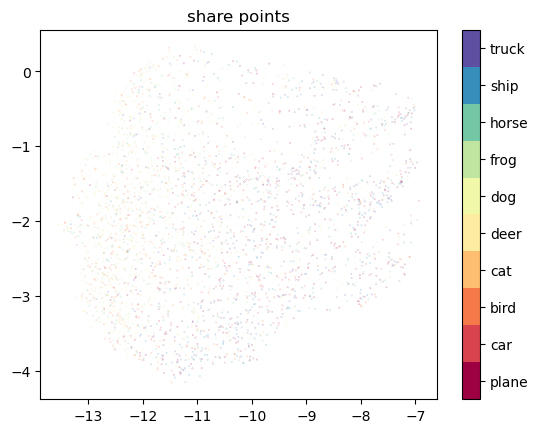

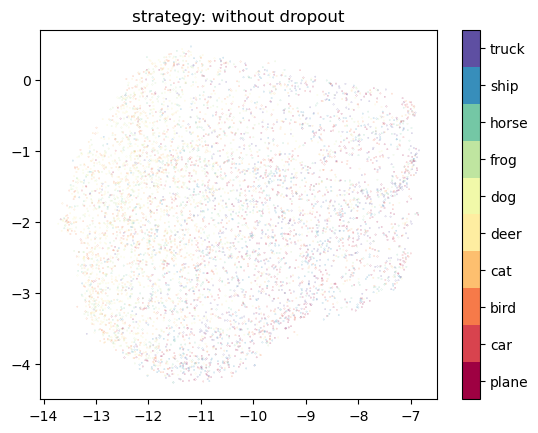

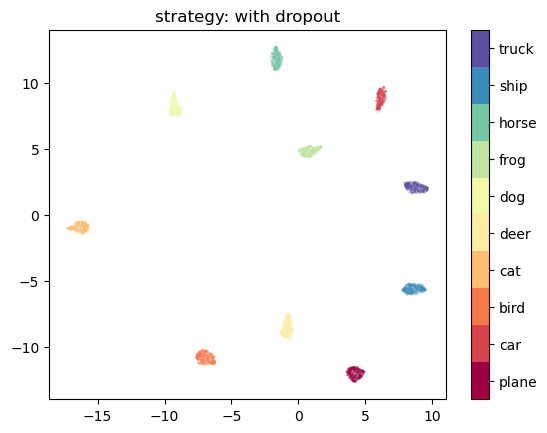

In [33]:
%matplotlib inline


classes= ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure()
plt.title('share points')
print(embA.shape)
plt.scatter(embA[:,0], embA[:,1], c=y_SETA, s=0.01, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

epochclist = ['without dropout','with dropout']

for i in range(n_SET):

    plt.figure()
    plt.title('strategy: {}'.format(epochclist[i]))
    embB = emb_sets[i]
    y_embB = y_SETS[i]
    plt.scatter(embB[:,0], embB[:,1], c=y_embB, s=0.01, cmap='Spectral')
    cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
    cbar.set_ticks(np.arange(10))
    cbar.set_ticklabels(classes)
